In [4]:
import pandas as pd
import pandas_profiling as pp
import visions as vis
import numpy as np
import random
from pandas_profiling.model.base import get_var_type, ProfilingTypeSet, get_counts
%load_ext autoreload
%autoreload 2

In [5]:
from pandas_profiling.config import config
config["vars"]["file"]["active"] = True
config["vars"]["image"]["active"] = True

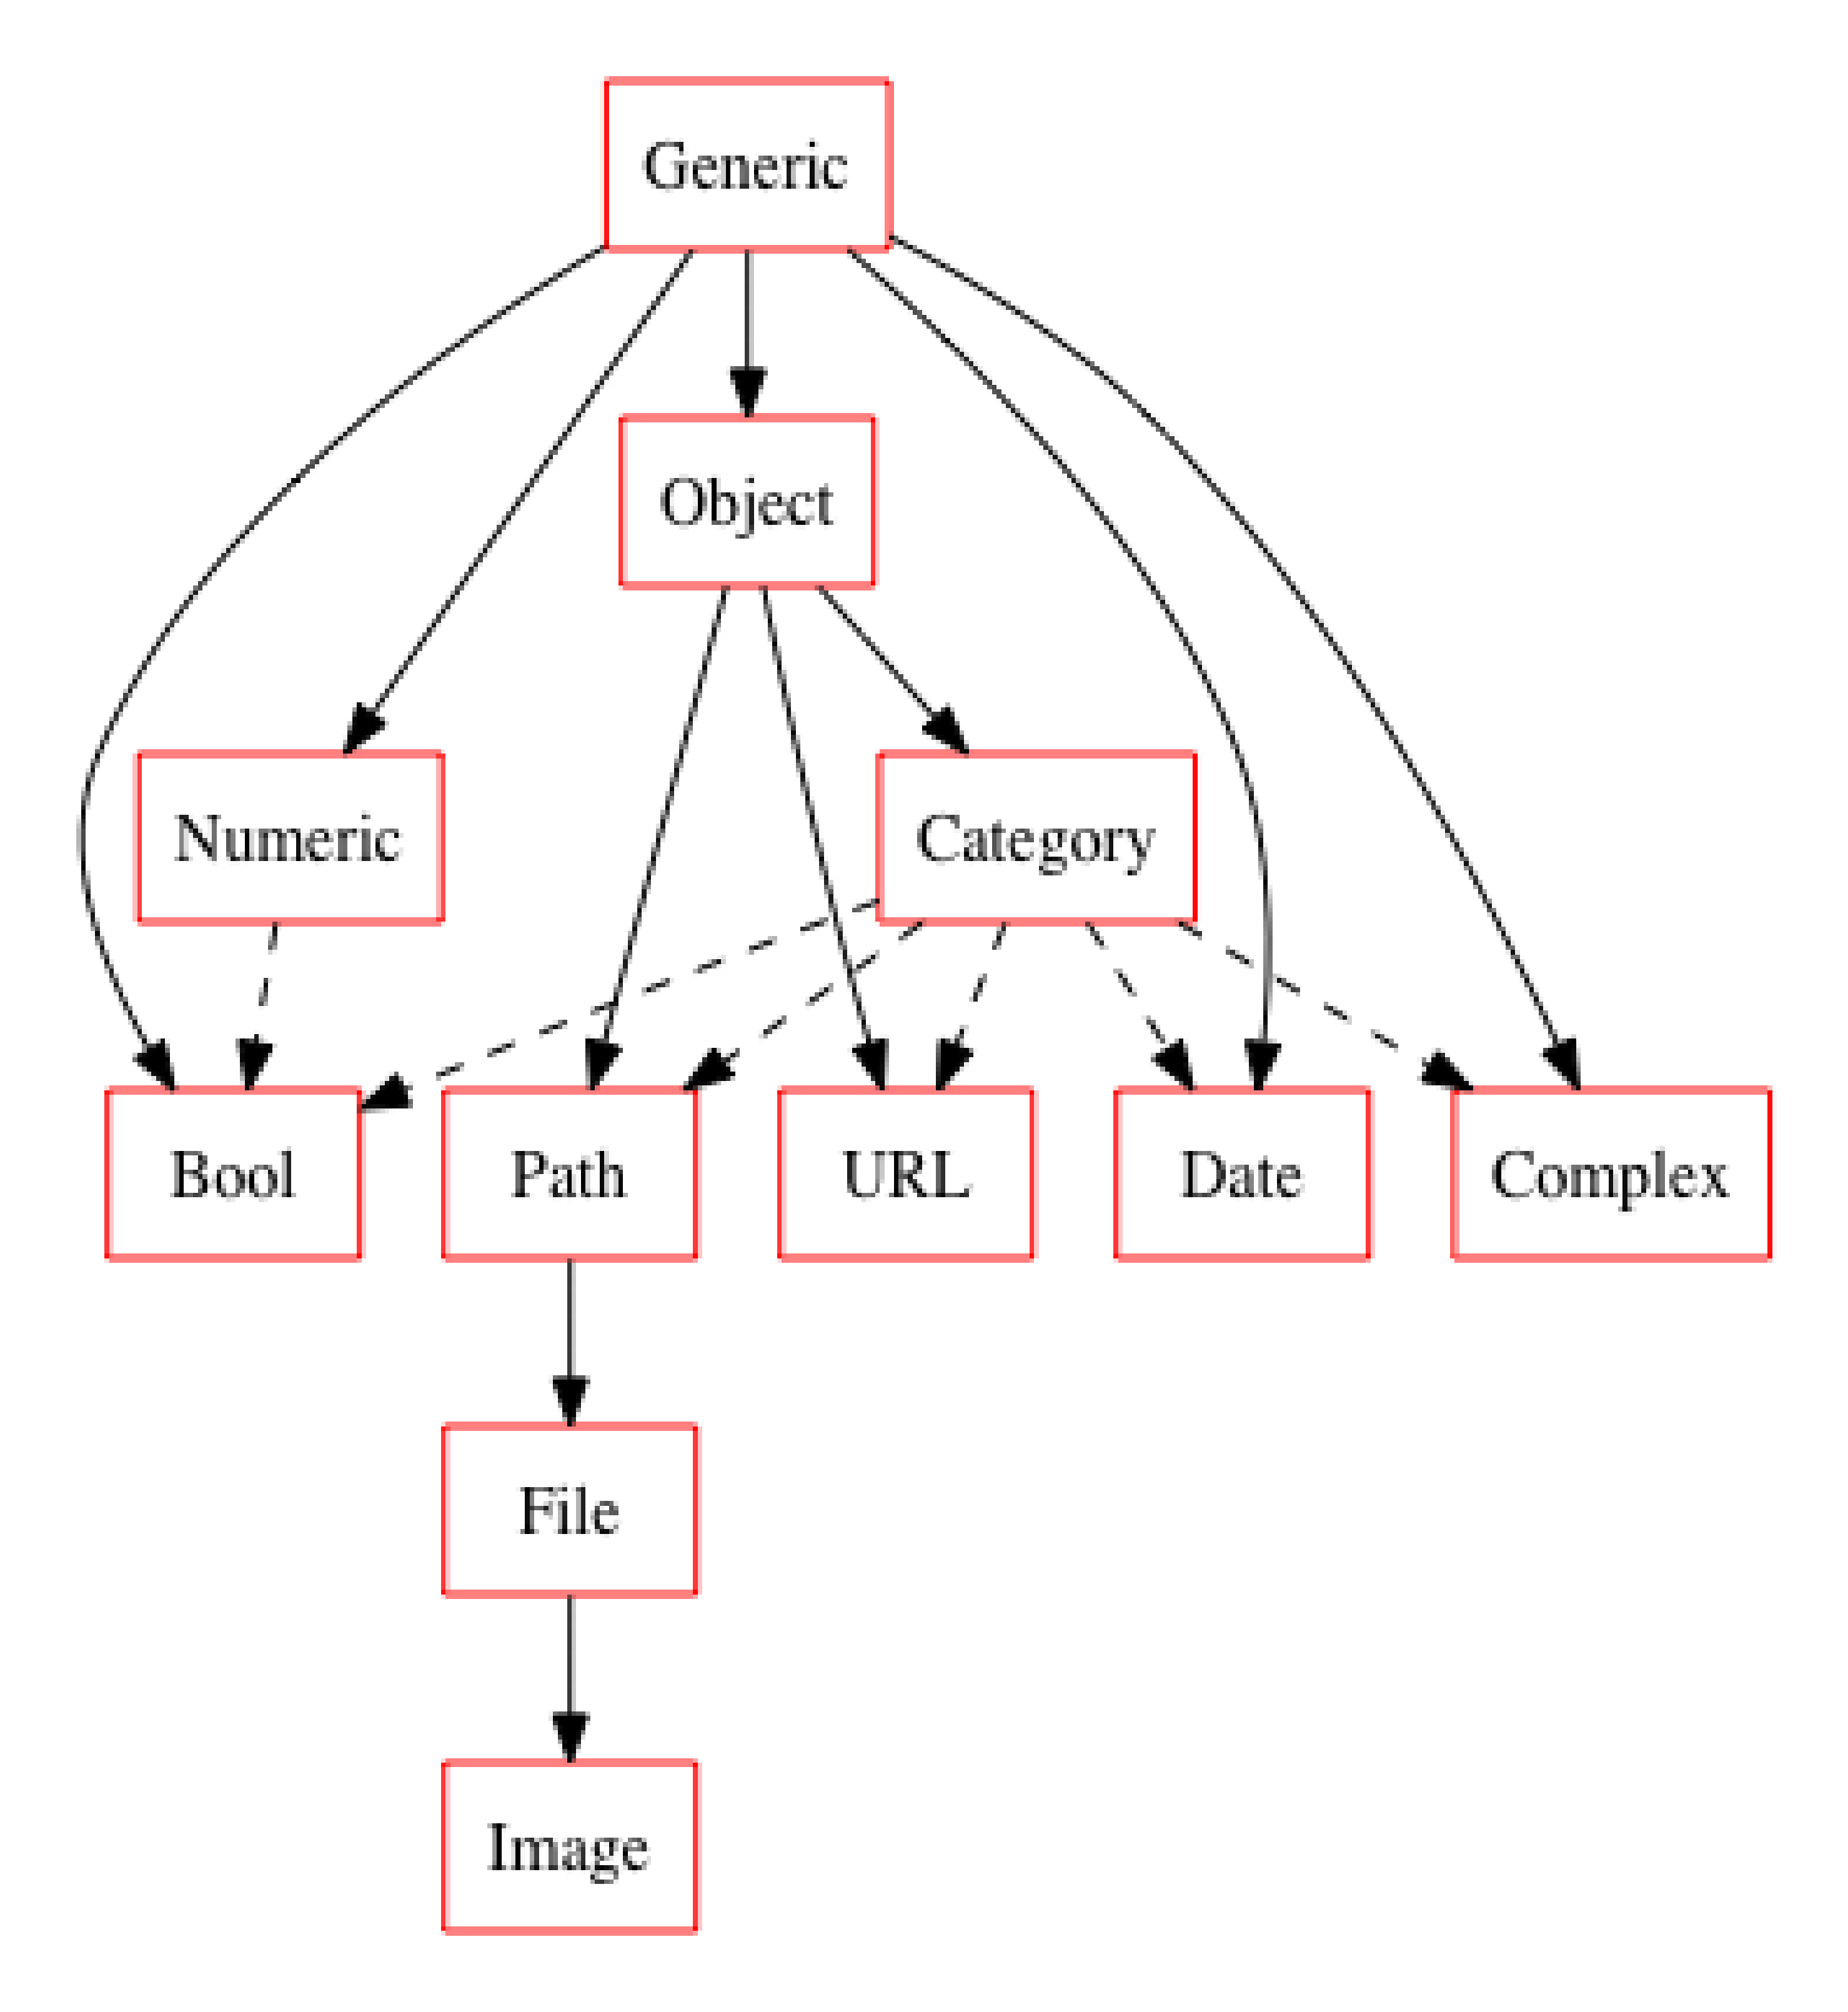

In [6]:
import pandas_profiling.model.typeset as ppt

typeset = ppt.ProfilingTypeSet()
typeset.plot_graph(dpi=1000)

In [7]:
df = pd.read_csv("https://data.nasa.gov/api/views/gh4g-9sfh/rows.csv?accessType=DOWNLOAD")

# Note: Pandas does not support dates before 1880, so we ignore these for this analysis
df["year"] = pd.to_datetime(df["year"], errors="coerce")

# Example: Constant variable
df["source"] = "NASA"

# Example: Boolean variable
df["boolean"] = np.random.choice([True, False], df.shape[0])

# Example: Mixed with base types
df["mixed"] = np.random.choice([1, "A"], df.shape[0])

# Example: Highly correlated variables
df["reclat_city"] = df["reclat"] + np.random.normal(scale=5, size=(len(df)))

# Example: Duplicate observations
duplicates_to_add = pd.DataFrame(df.iloc[0:10])
df = df.append(duplicates_to_add, ignore_index=True)

In [8]:
df['bool_col'] = [random.choice(['yes', 'no']) for _ in range(df.shape[0])]

In [9]:
df['mixed'] = pd.Series([[], np.nan] * (df.shape[0] // 2))
df['mixed2'] = pd.Series([[], {}] * (df.shape[0] // 2))

In [10]:
from pandas_profiling.model.typeset import ProfilingTypeSet

typeset = ProfilingTypeSet()
dtypes = typeset.detect_frame_type(df)
dtypes

{'name': Category,
 'id': Numeric,
 'nametype': Category,
 'recclass': Category,
 'mass (g)': Numeric,
 'fall': Category,
 'year': Date,
 'reclat': Numeric,
 'reclong': Numeric,
 'GeoLocation': Category,
 'source': Category,
 'boolean': Bool,
 'mixed': Category,
 'reclat_city': Numeric,
 'bool_col': Category,
 'mixed2': Category}

In [13]:
df.profile_report()

In [5]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/openeventdata/scraper/master/whitelist_urls.csv", header=None, names=["source", "url", "reach", "language"]
)

# Add ~10% missing values
df = df.mask(np.random.random(df.shape) < 0.1)

In [9]:
typeset.infer_series_type(df['url'])

String

In [15]:
from pandas_profiling.config import config
config['vars']['file']['active'].get(bool)

False

In [ ]:
typeset.

In [8]:
from pandas_profiling.model.base import ProfilingTypeSet
typeset = ProfilingTypeSet()

In [ ]:
typeset.plot_graph()

In [31]:

pd.api.types.is_numeric_dtype([np.inf])

False

In [28]:
Bool.relations[1].is_relation(pd.Series(['yes']))

True

In [48]:
n = 1000000
series = [-np.inf] * n
%timeit 

38.4 ms ± 4.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [49]:
%timeit any(np.inf == s or -np.inf == s for s in series)

654 ns ± 70.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [45]:
np.isfinite(-np.inf)

False

In [55]:
pd.options.mode.use_inf_as_na = False
pd.api.types.is_numeric_dtype(pd.Series([np.inf]))

True

In [52]:
pd.Series([np.inf])

0   NaN
dtype: float64

In [67]:
series = pd.Series([-np.inf, 1.0, np.nan])
value_counts_with_nan = series.value_counts(dropna=False)
value_counts_with_nan.reset_index().dropna().set_index("index").iloc[:, 0]

index
 1.0    1
-inf    1
Name: 0, dtype: int64

In [76]:
pd.api.types.is_numeric_dtype([1 + 0j])

False

In [71]:
series.view()

0   -inf
1    1.0
2    NaN
dtype: float64

In [29]:
import pandas_profiling as pp

pp.model.base.Numeric in [x.value for x in pp.model.base.Variable]

True

In [27]:
set(pp.model.base.Variable.values)

AttributeError: values

In [1]:
from pandas_profiling.model.base import get_var_type, Variable, ProfilingTypeSet
s = pd.Series([1, 2, 3, 6, np.inf])
typeset = ProfilingTypeSet()

typeset.infer_series_type(s)

ImportError: cannot import name 'ProfilingTypeSet' from 'pandas_profiling.model.base' (/Users/ian/repos/forks/pandas-profiling/src/pandas_profiling/model/base.py)

In [17]:
Variable.get_by_value('test')

In [20]:
type_to_func = {
    Variable.TYPE_BOOL: 1,
    Variable.TYPE_NUM: 2}

In [22]:
Variable.TYPE_BOOL in type_to_func

True

In [9]:
import pandas.api.types as pdt
pdt.is_list_like(pd.Series([1, 2]))

True

In [10]:
import os

os.path.isabs('/hello')

True

In [25]:
s = pd.Series([1, 0, 1.0, np.nan]).astype("Bool")
pdt.is_categorical_dtype(s)

False

In [14]:
s = pd.Series([1+2j]*1000000)

In [15]:
pdt.is_integer_dtype(s)

True

In [61]:
%timeit s.sum().imag == 0

8.61 ms ± 719 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [62]:
%timeit any(x.imag != 0 for x in s)

4.31 µs ± 432 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [67]:
%timeit s.astype(float)

3.91 ms ± 614 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [68]:
np.complex('1')

(1+0j)